# Présentation du Projet
Ce notebook présente le projet `projet-elo`, qui explore les systèmes de classement comme Elo, Glicko et Glicko-2. 
Nous testerons les principales classes et fonctions pour vérifier leur exactitude et démontrer leur utilisation.

## Importation des Modules Nécessaires
Nous commençons par importer les modules et classes nécessaires.

In [1]:
# Importation des modules
from modele_joueur import Joueur, generer_joueur, Jeu, tournoi_round_robin, tournoi_eliminatoire, tracer_competences, tracer_elo
from modele_joueur import tracer_force_elo, tracer_comparaison_evolution_elo, tracer_evolution_elo
import numpy as np

## Test de la Classe `Joueur`
Nous allons créer un joueur en utilisant la classe `Joueur` et tester ses méthodes.

In [2]:
# Création d'un joueur
player = Joueur("Doe", "John", 25, [8, 7, 6, 5, 4], [], [], [1500])
player.__str__()

#force du joueur 
print("Force du joueur:", player.force_joueur())

Nom : Doe
Prénom : John
Age : 25
Compétences : [8, 7, 6, 5, 4]
Historique des Elos : [1500]
Historique des parties : []
Historique des tournois : []
Force du joueur: 0.5333333333333333


## Test de la Fonction `generer_joueur`
Nous allons générer un joueur aléatoire et afficher ses attributs.

In [5]:
# Génération d'un joueur aléatoire
random_player = generer_joueur("Random", "Player")
random_player.__str__()

Nom : Random
Prénom : Player
Age : 24
Compétences : [4.3, 1.7, 2.9, 4.4, 2.4]
Historique des Elos : [1500]
Historique des parties : []
Historique des tournois : []


## Test de la Classe `Jeu`
Nous allons créer un jeu et afficher ses détails.

In [7]:
# Création d'un jeu
jeu = Jeu("Chess", 0.3)
jeu.__str__()

'<modele_joueur.jeu.Jeu object at 0x000002559B836710>'

## Test des Fonctions de Tournoi
Nous allons simuler un tournoi en round-robin et un tournoi à élimination directe.

In [11]:
# Génération des joueurs
players = [generer_joueur(f"Player{i}", f"Test{i}") for i in range(8)]

# Tournoi Round-robin
print("Tournoi Round-robin :")
round_robin_resultats = tournoi_round_robin(players, jeu)
for player in round_robin_resultats:
    print(player.nom, player.prenom, player.histo_elo[-1])

# Tournoi élimination
print("\Tournoi élimination:")
elimination_resultats = tournoi_eliminatoire(players)
for player in elimination_resultats:
    print(player.nom, player.prenom, player.histo_elo[-1])

Tournoi Round-robin :
Player3 Test3 1563.3021786127463
Player1 Test1 1553.7465595106826
Player4 Test4 1536.9611644055187
Player6 Test6 1518.953605360145
Player0 Test0 1491.275020733077
Player5 Test5 1463.5934213464056
Player7 Test7 1448.933946894667
Player2 Test2 1423.2341031367575
\Tournoi élimination:
tour 1:


TypeError: rencontre_sigmoide() missing 1 required positional argument: 'jeu'

## Test des Fonctions de Visualisation
Nous allons visualiser la distribution des compétences des joueurs et des classements Elo.

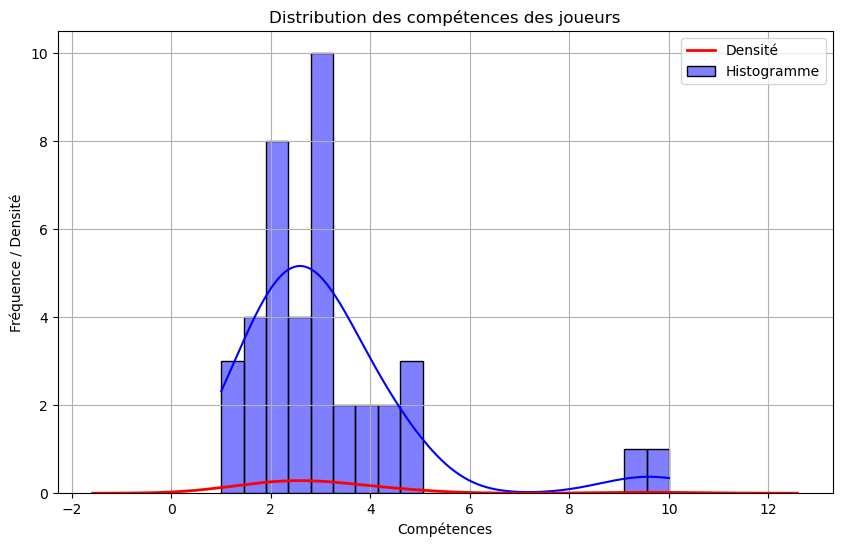

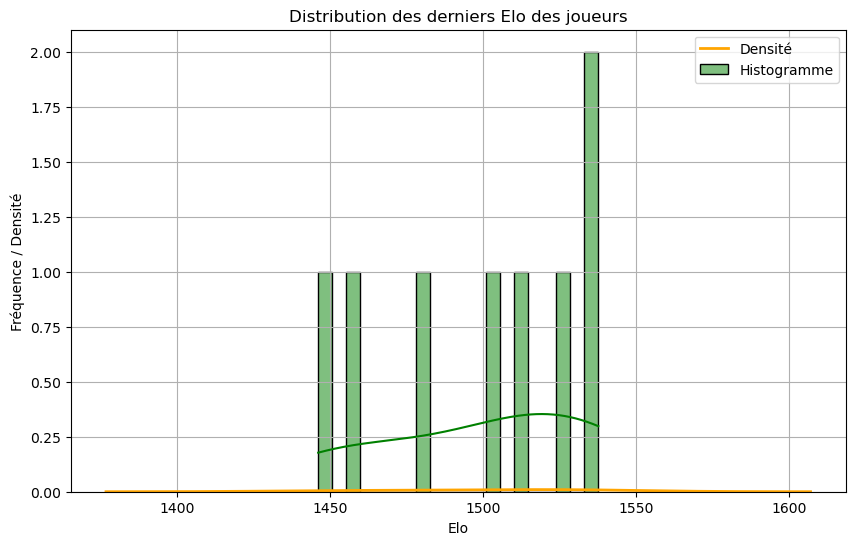

In [6]:
# Visualisation des compétences des joueurs
tracer_competences(players)

# Visualizing Elo ratings
tracer_elo(players)

## Test de l'Évolution du Classement Elo
Nous allons suivre l'évolution du classement Elo d'un joueur au cours de plusieurs tournois.

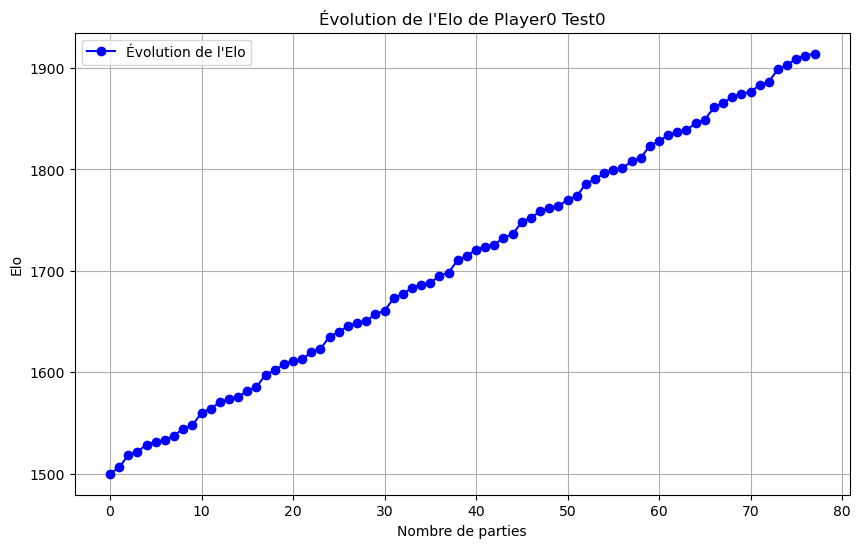

In [7]:
# Simulation de plusieurs tournois
for _ in range(10):
    tournoi_round_robin(players, game)

# Visualizing Elo evolution for the first player
tracer_evolution_elo(players[0])